In [2]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv("/content/kc_house_data.csv")
df.drop(['id','date'],axis=1,inplace=True)
df.isnull().sum()

In [ ]:
df.corr()


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
price,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626,0.585379,0.082447
bedrooms,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244
bathrooms,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175
sqft_living,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286
sqft_lot,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557
floors,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
waterfront,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575
condition,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406
grade,0.667434,0.356967,0.664983,0.762704,0.113621,0.458183,0.082775,0.251321,-0.144674,1.000000,0.755923,0.168392,0.446963,0.014414,-0.184862,0.114084,0.198372,0.713202,0.119248


We choose Sqtft_living and grade as the two features since they have strong correlation with price


In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import metrics


In [ ]:
x=df["sqft_living"].values[:,np.newaxis]
y=df["price"].values
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=40)
model=LinearRegression()
model.fit(x_train,y_train)
predicted=model.predict(x_test)




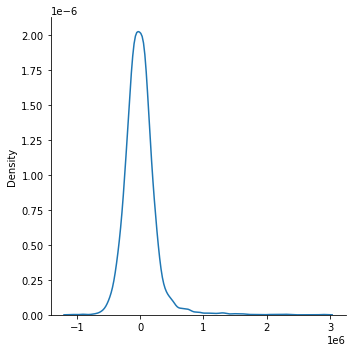

In [ ]:
import seaborn as sns
residuals = y_test - predicted
sns.displot(residuals, kind='kde')




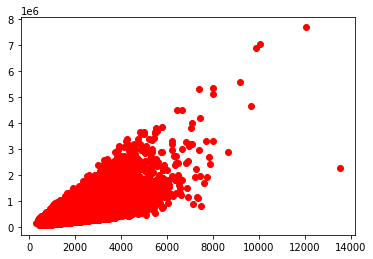

In [ ]:
plt.scatter(x,y,color="r")

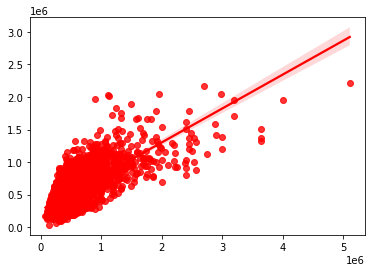

In [ ]:
sns.regplot(x=y_test,y=predicted,color ='red');

In [ ]:
print("MSE", mean_squared_error(y_test,predicted))
print("R squared", metrics.r2_score(y_test,predicted))

MSE 62451720102.954
R squared 0.5035535751151091


MSE 57296260421.90227
R squared 0.54453578542216


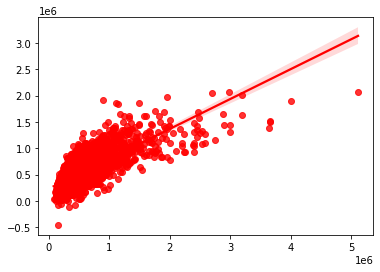

In [ ]:
features = ["sqft_living","grade"]
x2=df[features].values.reshape(-1, len(features))
y2=df["price"].values
x2_train,x2_test,y2_train,y2_test=train_test_split(x2,y2,test_size=0.20,random_state=40)
model.fit(x2_train,y2_train)
predicted2=model.predict(x2_test)

print("MSE", mean_squared_error(y2_test,predicted2))
print("R squared", metrics.r2_score(y2_test,predicted2))
sns.regplot(x=y2_test,y=predicted2,color ='red');